# Kaggle's Blue Book for Bulldozers
- https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview


#### 1. Problem Definition
   - How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for
    
#### 2. Data 
- Data is from kaggle Bluebook for Bulldozers competetion.  
 - https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

    - Train.csv is the training set, which contains data through the end of 2011.
    - Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
    - Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

#### 3. Features
- Kaggle offers a data dictionary of all features of the dataset.

- The key fields are in train.csv are:
    - SalesID: the uniue identifier of the sale
    - MachineID: the unique identifier of a machine.  A machine can be sold multiple times
    - saleprice: what the machine sold for at auction (only provided in train.csv)
    - saledate: the date of the sale
- There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.


### Import Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost
import catboost as cb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Import Data

In [2]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 parse_dates=["saledate"] ) 

df.head(5).T

/var/folders/px/5m8j76fj1bnbd7y2t1xn4plr0000gn/T/ipykernel_2609/1630727057.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",


,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Exploratory data analysis
- 1. What kinds of data do we have? 
- 2. Is there missing data?
- 3. What are the outliers?
- 4. How can you add, change or remove features to get more out of your data?




In [3]:
#check for null values
df.isna().sum()

#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

### Observations: 
- Data types consist of integers, floats, objects, and datetime
- Dataset includes null values
- Dataset consists of 412698 entries 

## Finding patterns within columns 

### Saledate to Saleprice

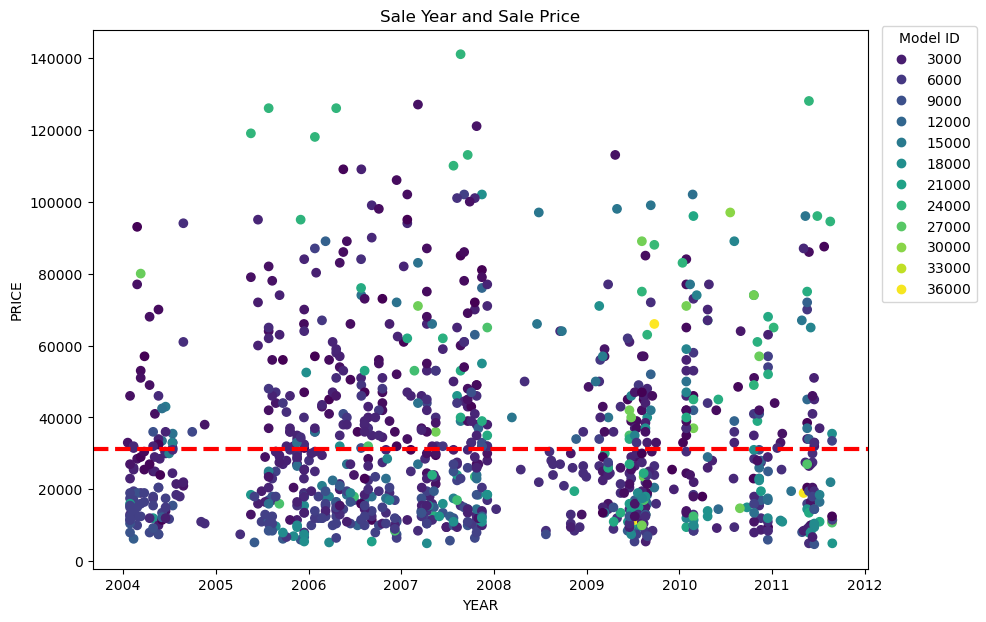

In [4]:
fig,ax = plt.subplots(figsize = (10,7))


#create a scatter plot of saledate and saleprice
scatter = ax.scatter(df["saledate"].head(1000), df["SalePrice"].head(1000), c = df["ModelID"].head(1000))


#customize plot
ax.set(title= "Sale Year and Sale Price",
      xlabel="YEAR",
      ylabel="PRICE",
);
ax.legend(*scatter.legend_elements(), 
          title = "Model ID",
         bbox_to_anchor=(1.15, 1.02));

#draw price meanline
ax.axhline(df["SalePrice"].mean(), 
           linestyle = "--" , c= "red", linewidth = 3
              );


### Observations:
- The distribution of all sales over the years is relatively balanced.
- The distribution of lower-end and higher-end sales is relatively even with lower ends sales being more frequent and consistent.
- 90 percent of the sale prices are below 65,000 with the average close to 30,000



### Duplicate DataFrame and sort by saledate

In [5]:
df_copy = df.sort_values(by= "saledate")

# Preprocessing

### Feature Engineering - Data enriching

 - Through the saledate column, we can assign month, day, day of week and year as new columns to engineer futher data for the model to learn and understand patterns. 


In [6]:
#additional columns 
df_copy["SaleYear"] = df_copy.saledate.dt.year
df_copy["SaleMonth"] = df_copy.saledate.dt.month
df_copy["SaleDay"] = df_copy.saledate.dt.day
df_copy["SaleDayOfWeek"] = df_copy.saledate.dt.day_of_week
df_copy["SaleDayOfYear"] = df_copy.saledate.dt.day_of_year

#drop saledate
df_copy.drop("saledate", axis = 1, inplace=True)

### Transform String Columns
- from Objects to Categories

In [7]:
# for loop checks and tallies up the count of string datatypes

total = 0
for k,v in df_copy.items():
    if pd.api.types.is_string_dtype(v.dtype):
            total = total + 1 
print(f"Total number of string dtype columns: {total}")



# for loop checks converts datatype to category

count = 0
for k, v in df_copy.items():
    if pd.api.types.is_string_dtype(v.dtype):
        df_copy[k] = df_copy[k].astype("category")
        count = count + 1
print(f"Total number of columns converted to category dtype: {count}")


Total number of string dtype columns: 44
Total number of columns converted to category dtype: 44


## Train and Validation Split

- Assign 2012 sales to validation data and the remaining to train data

In [8]:
X_train = df_copy[df_copy["SaleYear"] != 2012].drop("SalePrice", axis = 1)
y_train = df_copy[df_copy["SaleYear"] != 2012].SalePrice

X_valid = df_copy[df_copy["SaleYear"] == 2012].drop("SalePrice", axis = 1)
y_valid = df_copy[df_copy["SaleYear"] == 2012].SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 56), (401125,), (11573, 56), (11573,))

###  Transform Train and Validation data

- Fill numerical column's missing values with column's median
- Turn categorical columns, label encoded
- Insert additional null value binary columns to show whether original sample had missing value   

In [9]:
# X_train numerical data 

for cols, info in X_train.items(): # for all columns in dataset
    if pd.api.types.is_numeric_dtype(info): # if column is numeric
        if X_train[cols].isna().sum(): #if the numeric column has null values
            X_train[cols+ "_missing"] = X_train[cols].isna() #new boolean columns showing if values were missing
            X_train[cols].fillna(X_train[cols].median(), inplace=True) #fill all null numeric cols with cols median
      
    
# X_train categorical data  

for cols, info in X_train.items(): # for all columns in dataset
    if not pd.api.types.is_numeric_dtype(info): # if column is not numeric
             X_train[cols+ "_missing"] = X_train[cols].isna() #new boolean columns showing if values were missing
             X_train[cols] = info.cat.codes+1 #assigns columns vals to their categorical index codes (plus 1 for null vals (-1 to 0))


        
        
# X_valid numerical data

for cols, info in X_valid.items(): # for all columns in dataset
    if pd.api.types.is_numeric_dtype(info): # if column is numeric
        if X_valid[cols].isna().sum(): #if the numeric column has null values
            X_valid[cols+ "_missing"] = X_valid[cols].isna() #new boolean columns showing if values were missing
            X_valid[cols].fillna(X_valid[cols].median(), inplace=True) #fill all null numeric cols with cols median
            
          
        

# X_valid categorical data 

for cols, info in X_valid.items(): # for all columns in dataset
    if not pd.api.types.is_numeric_dtype(info): # if column is not numeric
             X_valid[cols+ "_missing"] = X_valid[cols].isna() #new boolean columns showing if values were missing
             X_valid[cols] = info.cat.codes+1 #assigns columns vals to their categorical index codes (plus 1 for null vals (-1 to 0))


            

### Train and Validation dataset comparisons

In [10]:
print(X_train.shape, X_valid.shape)
print(f'\n Columns missing from validation dataset: {set(X_train) - set(X_valid)}')

(401125, 102) (11573, 101)

 Columns missing from validation dataset: {'auctioneerID_missing'}


### Key note: 
 - The 'auctioneerID_missing' column is not in the validation dataset since the "auctioneerID" column does not have null values. It has to be added manually to match the shape of data the model trains on.

In [12]:
pos = list(X_train.columns).index("auctioneerID_missing")
X_valid.insert(pos, 'auctioneerID_missing', X_valid["auctioneerID"].isna())

### Functionize Preprocessing Steps

In [11]:
def data_preprocessing(df):
    """
    Transforms and returns the df in the expected format for
    the model to make predictions.
    
    """
    
    #feature engineering
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.day_of_week
    df["SaleDayOfYear"] = df.saledate.dt.day_of_year
    
    #drop saledate
    df.drop("saledate", axis = 1, inplace=True)
        
    
    #convert objects to categories
    for cols, info in df.items():
        if pd.api.types.is_string_dtype(info):
            df[cols] = df[cols].astype("category")
    
            
    #fill missing values with the columns median       
    for cols, info in df.items():
        if pd.api.types.is_numeric_dtype(info):
            if info.isna().sum():
                df[cols].fillna(df[cols].median(), inplace=True)


    #convert categorical values to their codes + 1 and insert new columns
        if not pd.api.types.is_numeric_dtype(info):
            df[cols+"_missing"] = df[cols].isna()
            df[cols] = df[cols].cat.codes + 1

    return df

    

# Model Fit and Evaluation

- Fit data using RandomForestRegressor model
    - on 10000 samples
- Create an Evaluation function that returns the following scoring metrics on both train and validation data.
    - Accuracy (r2),
    - Mean Absolute Error, 
    - Mean Squared Error
    - Root Mean Squared Logarithmic Error (RMSLE)

In [13]:
model = RandomForestRegressor(n_jobs= -1,
                              max_samples=10000)

In [14]:
def model_evaluations(model, X_train, y_train, X_valid, y_valid):
    
    '''
    calculates root mean squared log error, mean absolute error, mean squared error, 
    and r^2 for train and validation data
    '''
    
    
    #fit the model
    model.fit(X_train, y_train) #fit the model on training data
    
    #make predictions
    y_preds_train = model.predict(X_train) #predictions on train data
    y_preds_val = model.predict(X_valid) #predictions on val data

    
    #evaluate predictions
    r2_train = r2_score(y_train, y_preds_train)
    r2_valid = r2_score(y_valid, y_preds_val)
    MAE_train = mean_absolute_error(y_train, y_preds_train)
    MAE_valid = mean_absolute_error(y_valid, y_preds_val)
    MSE_train = mean_squared_error(y_train, y_preds_train)
    MSE_valid = mean_squared_error(y_valid, y_preds_val)
    RMSLE_train = np.sqrt(mean_squared_log_error(y_train, y_preds_train))
    RMSLE_valid = np.sqrt(mean_squared_log_error(y_valid, y_preds_val))
   
    
     
    #assign scores to dictionary values   
    scores = {
        
              "Accuracy_train_data": r2_train,
              "Accuracy_validation_data": r2_valid,
              "MAE_train_data": MAE_train,
              "MAE_validation_data":MAE_valid,
              "MSE_train_data": MSE_train,
              "MSE_validation_data":MSE_valid,
              "RMSLE_score_train_data": RMSLE_train,
              "RMSLE_score_validation_data": RMSLE_valid,
                        
          }
                          
    return scores

In [15]:
%%time
model_evaluations(model,X_train, y_train, X_valid, y_valid )

CPU times: user 34.4 s, sys: 480 ms, total: 34.8 s
Wall time: 5.23 s


{'Accuracy_train_data': 0.8607315367953408,
 'Accuracy_validation_data': 0.8324404508237813,
 'MAE_train_data': 5557.778685646618,
 'MAE_validation_data': 7167.899125550851,
 'MSE_train_data': 73909407.08873495,
 'MSE_validation_data': 115092032.02591865,
 'RMSLE_score_train_data': 0.2575132033204654,
 'RMSLE_score_validation_data': 0.2939065323827565}

# Hyperparameter Tuning Random Forest Regressor

-  Find the best parameters for RandomForestRegressor using RandomSearchCV 
    - 5 iterations 
    - 5 cross validation splits
    
- Train and evaluate RandomForestRegressor model using ideal parameters on all data
    

In [16]:
#different RandomForestRegressor hyperparameters
grid_rf = {
    
    "n_estimators": np.arange(10,100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features":[0.5, "auto", "sqrt"],
    "max_samples": [10000] 
    
}


#create random search CV model
model_rs = RandomizedSearchCV(estimator=model,
                              param_distributions=grid_rf,
                              n_iter=5,
                              cv = 5,
                              n_jobs= -1,
                              verbose=False
                         )

#fit and evaluate random search CV model
model_evaluations(model_rs,X_train, y_train, X_valid, y_valid)

#best random search CV model parameters
model_rs.best_params_

#create ideal model using random search cv best parameters
ideal_model_rf = RandomForestRegressor(n_estimators=60,                                    
                                    min_samples_split=12,
                                    min_samples_leaf=1,
                                    max_features="auto",
                                    n_jobs=-1,
                                    max_depth= None,
                                    max_samples=None)

#fit and evaluate ideal model
ideal_rf_model_evaluations  = model_evaluations(ideal_model_rf, X_train, y_train, X_valid, y_valid)


/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [17]:
ideal_rf_model_evaluations

{'Accuracy_train_data': 0.9657110646708795,
 'Accuracy_validation_data': 0.8724563957369447,
 'MAE_train_data': 2656.241703064204,
 'MAE_validation_data': 6119.11060552134,
 'MSE_train_data': 18197047.785004098,
 'MSE_validation_data': 87606183.34623717,
 'RMSLE_score_train_data': 0.13229738478976016,
 'RMSLE_score_validation_data': 0.25224177406956416}


# Hyperparameter Tuning CatBoost Regressor

-  Find the best parameters for CatBoost model using RandomSearchCV 
    - 5 iterations 
    - 5 cross validation splits
    
- Train and evaluate CatBoost model using ideal parameters on all data

### Instantiate and fit model

In [66]:
#create train and validation datasets
train_dataset = cb.Pool(X_train, y_train) 
validation_dataset = cb.Pool(X_valid, y_valid)

#instantiate catboost model
model = cb.CatBoostRegressor()

#catboost parameter grid
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

#fit random search CV model 
model.randomized_search(grid, 
                        train_dataset, 
                        n_iter= 5,
                        cv = 5, 
                        train_size = 0.025,
                        verbose = 0)

#random search CV best parameters
model.get_params()

#create ideal catboost model
ideal_model_catboost = cb.CatBoostRegressor(loss_function='RMSE',
                                           depth=8,
                                           iterations = 100,
                                           learning_rate = 0.1,
                                           l2_leaf_reg= 0.5
                                           )

#fit ideal catboost model
ideal_model_catboost.fit(X_train, y_train)

0:	learn: 37838.5937293	test: 37859.3155125	best: 37859.3155125 (0)	total: 5.21ms	remaining: 777ms
1:	learn: 37055.2589998	test: 37072.4375848	best: 37072.4375848 (1)	total: 13.1ms	remaining: 972ms
2:	learn: 36269.6587507	test: 36288.7320277	best: 36288.7320277 (2)	total: 20.5ms	remaining: 1s
3:	learn: 35543.9690224	test: 35559.5349788	best: 35559.5349788 (3)	total: 26.2ms	remaining: 956ms
4:	learn: 34847.3796687	test: 34859.4574827	best: 34859.4574827 (4)	total: 31.2ms	remaining: 904ms
5:	learn: 34171.8948345	test: 34181.3303300	best: 34181.3303300 (5)	total: 36.4ms	remaining: 874ms
6:	learn: 33509.7205220	test: 33514.8084194	best: 33514.8084194 (6)	total: 42.1ms	remaining: 860ms
7:	learn: 32896.7006135	test: 32899.5796848	best: 32899.5796848 (7)	total: 50.5ms	remaining: 896ms
8:	learn: 32330.0586937	test: 32329.1562221	best: 32329.1562221 (8)	total: 56ms	remaining: 877ms
9:	learn: 31759.6230810	test: 31752.9808531	best: 31752.9808531 (9)	total: 61.8ms	remaining: 865ms
10:	learn: 3123

103:	learn: 16901.1193262	test: 16888.8592676	best: 16888.8592676 (103)	total: 611ms	remaining: 270ms
104:	learn: 16856.2735830	test: 16843.2000527	best: 16843.2000527 (104)	total: 616ms	remaining: 264ms
105:	learn: 16830.8057685	test: 16820.1811711	best: 16820.1811711 (105)	total: 623ms	remaining: 259ms
106:	learn: 16792.5483465	test: 16782.4530032	best: 16782.4530032 (106)	total: 629ms	remaining: 253ms
107:	learn: 16761.7693432	test: 16752.2442223	best: 16752.2442223 (107)	total: 635ms	remaining: 247ms
108:	learn: 16722.1272709	test: 16711.8588576	best: 16711.8588576 (108)	total: 641ms	remaining: 241ms
109:	learn: 16684.7415965	test: 16673.7548110	best: 16673.7548110 (109)	total: 646ms	remaining: 235ms
110:	learn: 16649.4949982	test: 16639.8247089	best: 16639.8247089 (110)	total: 653ms	remaining: 230ms
111:	learn: 16621.1546723	test: 16612.3675941	best: 16612.3675941 (111)	total: 659ms	remaining: 223ms
112:	learn: 16585.5284146	test: 16576.0657941	best: 16576.0657941 (112)	total: 664

35:	learn: 20777.4558833	test: 20796.6973266	best: 20796.6973266 (35)	total: 355ms	remaining: 631ms
36:	learn: 20541.9630303	test: 20563.3457695	best: 20563.3457695 (36)	total: 364ms	remaining: 620ms
37:	learn: 20329.0275515	test: 20349.9315923	best: 20349.9315923 (37)	total: 374ms	remaining: 610ms
38:	learn: 20136.9687848	test: 20159.7759350	best: 20159.7759350 (38)	total: 384ms	remaining: 601ms
39:	learn: 19934.6040425	test: 19958.5345400	best: 19958.5345400 (39)	total: 393ms	remaining: 590ms
40:	learn: 19688.8890288	test: 19714.2171033	best: 19714.2171033 (40)	total: 402ms	remaining: 578ms
41:	learn: 19513.5221319	test: 19539.5878139	best: 19539.5878139 (41)	total: 411ms	remaining: 568ms
42:	learn: 19326.4613284	test: 19351.1010573	best: 19351.1010573 (42)	total: 424ms	remaining: 562ms
43:	learn: 19156.5681643	test: 19182.7024599	best: 19182.7024599 (43)	total: 436ms	remaining: 555ms
44:	learn: 18995.6483176	test: 19024.8922198	best: 19024.8922198 (44)	total: 444ms	remaining: 542ms


32:	learn: 14275.9155447	test: 14389.9983537	best: 14389.9983537 (32)	total: 447ms	remaining: 907ms
33:	learn: 14179.5163076	test: 14296.7608034	best: 14296.7608034 (33)	total: 456ms	remaining: 886ms
34:	learn: 14078.6041608	test: 14200.3771210	best: 14200.3771210 (34)	total: 465ms	remaining: 863ms
35:	learn: 13973.5633401	test: 14096.6966728	best: 14096.6966728 (35)	total: 474ms	remaining: 843ms
36:	learn: 13918.3796062	test: 14048.5558804	best: 14048.5558804 (36)	total: 483ms	remaining: 822ms
37:	learn: 13844.0718263	test: 13979.6752028	best: 13979.6752028 (37)	total: 492ms	remaining: 802ms
38:	learn: 13754.8995397	test: 13889.8608447	best: 13889.8608447 (38)	total: 500ms	remaining: 782ms
39:	learn: 13664.9427248	test: 13800.7448222	best: 13800.7448222 (39)	total: 507ms	remaining: 761ms
40:	learn: 13603.6612868	test: 13748.1710638	best: 13748.1710638 (40)	total: 515ms	remaining: 741ms
41:	learn: 13552.1197512	test: 13704.4111159	best: 13704.4111159 (41)	total: 523ms	remaining: 723ms


24:	learn: 12992.4742819	test: 13367.1255560	best: 13367.1255560 (24)	total: 421ms	remaining: 1.26s
25:	learn: 12804.5641425	test: 13201.8819104	best: 13201.8819104 (25)	total: 437ms	remaining: 1.24s
26:	learn: 12688.3713626	test: 13097.8643822	best: 13097.8643822 (26)	total: 453ms	remaining: 1.23s
27:	learn: 12555.9240509	test: 12961.3503413	best: 12961.3503413 (27)	total: 469ms	remaining: 1.21s
28:	learn: 12407.7301193	test: 12825.3510645	best: 12825.3510645 (28)	total: 485ms	remaining: 1.19s
29:	learn: 12230.5311755	test: 12673.1335782	best: 12673.1335782 (29)	total: 500ms	remaining: 1.17s
30:	learn: 12067.5404831	test: 12527.4743034	best: 12527.4743034 (30)	total: 515ms	remaining: 1.15s
31:	learn: 11984.3635245	test: 12462.1552997	best: 12462.1552997 (31)	total: 530ms	remaining: 1.13s
32:	learn: 11868.3182148	test: 12349.9254380	best: 12349.9254380 (32)	total: 546ms	remaining: 1.11s
33:	learn: 11724.3548215	test: 12221.2401613	best: 12221.2401613 (33)	total: 563ms	remaining: 1.09s


13:	learn: 17034.2295002	test: 17192.2408878	best: 17192.2408878 (13)	total: 236ms	remaining: 1.45s
14:	learn: 16393.1484375	test: 16555.7470488	best: 16555.7470488 (14)	total: 252ms	remaining: 1.43s
15:	learn: 15911.9855618	test: 16094.8908157	best: 16094.8908157 (15)	total: 267ms	remaining: 1.4s
16:	learn: 15454.5412998	test: 15648.9317350	best: 15648.9317350 (16)	total: 284ms	remaining: 1.39s
17:	learn: 15027.5585852	test: 15247.4673690	best: 15247.4673690 (17)	total: 301ms	remaining: 1.37s
18:	learn: 14685.4536150	test: 14932.8114447	best: 14932.8114447 (18)	total: 319ms	remaining: 1.36s
19:	learn: 14330.7314078	test: 14595.2607070	best: 14595.2607070 (19)	total: 338ms	remaining: 1.35s
20:	learn: 14007.2655626	test: 14280.6647066	best: 14280.6647066 (20)	total: 353ms	remaining: 1.33s
21:	learn: 13744.6987598	test: 14032.7787459	best: 14032.7787459 (21)	total: 370ms	remaining: 1.31s
22:	learn: 13479.3739401	test: 13769.0998861	best: 13769.0998861 (22)	total: 394ms	remaining: 1.32s
2

99:	learn: 8869.0558342	test: 10065.9452349	best: 10065.9452349 (99)	total: 1.71s	remaining: 0us

bestTest = 10065.94523
bestIteration = 99

Training on fold [0/5]
0:	learn: 35429.5622035	test: 35606.7378385	best: 35606.7378385 (0)	total: 59.5ms	remaining: 5.89s
1:	learn: 32569.9211705	test: 32733.5183100	best: 32733.5183100 (1)	total: 106ms	remaining: 5.19s
2:	learn: 30042.4316070	test: 30192.4557526	best: 30192.4557526 (2)	total: 154ms	remaining: 4.98s
3:	learn: 27796.0587660	test: 27931.3588520	best: 27931.3588520 (3)	total: 203ms	remaining: 4.87s
4:	learn: 25833.9463579	test: 25956.7101040	best: 25956.7101040 (4)	total: 250ms	remaining: 4.75s
5:	learn: 24067.7997682	test: 24183.4867506	best: 24183.4867506 (5)	total: 297ms	remaining: 4.65s
6:	learn: 22520.2469151	test: 22629.2660275	best: 22629.2660275 (6)	total: 341ms	remaining: 4.53s
7:	learn: 21177.5436566	test: 21275.4034662	best: 21275.4034662 (7)	total: 388ms	remaining: 4.46s
8:	learn: 19938.7630587	test: 20032.1664343	best: 2

82:	learn: 9397.9195440	test: 9461.3562553	best: 9461.3562553 (82)	total: 3.69s	remaining: 757ms
83:	learn: 9378.9566063	test: 9442.1978090	best: 9442.1978090 (83)	total: 3.73s	remaining: 711ms
84:	learn: 9360.7054253	test: 9424.8459918	best: 9424.8459918 (84)	total: 3.77s	remaining: 665ms
85:	learn: 9337.6757269	test: 9401.4357855	best: 9401.4357855 (85)	total: 3.81s	remaining: 621ms
86:	learn: 9318.1503608	test: 9382.7352817	best: 9382.7352817 (86)	total: 3.85s	remaining: 575ms
87:	learn: 9299.0518002	test: 9365.1717613	best: 9365.1717613 (87)	total: 3.89s	remaining: 531ms
88:	learn: 9287.3094998	test: 9355.0440553	best: 9355.0440553 (88)	total: 3.94s	remaining: 487ms
89:	learn: 9278.7070917	test: 9347.1018823	best: 9347.1018823 (89)	total: 3.98s	remaining: 443ms
90:	learn: 9263.0208090	test: 9331.8202775	best: 9331.8202775 (90)	total: 4.03s	remaining: 399ms
91:	learn: 9247.2605680	test: 9315.4825648	best: 9315.4825648 (91)	total: 4.08s	remaining: 355ms
92:	learn: 9236.4404221	test: 

68:	learn: 9750.5143786	test: 9845.9638276	best: 9845.9638276 (68)	total: 2.84s	remaining: 1.27s
69:	learn: 9722.9493388	test: 9818.4888272	best: 9818.4888272 (69)	total: 2.88s	remaining: 1.23s
70:	learn: 9702.1349836	test: 9796.4651869	best: 9796.4651869 (70)	total: 2.92s	remaining: 1.19s
71:	learn: 9683.0953277	test: 9777.3571694	best: 9777.3571694 (71)	total: 2.96s	remaining: 1.15s
72:	learn: 9661.4995108	test: 9755.1518597	best: 9755.1518597 (72)	total: 2.99s	remaining: 1.11s
73:	learn: 9639.9575225	test: 9733.1214548	best: 9733.1214548 (73)	total: 3.03s	remaining: 1.06s
74:	learn: 9611.8631725	test: 9703.6680159	best: 9703.6680159 (74)	total: 3.07s	remaining: 1.02s
75:	learn: 9584.8838239	test: 9675.4722615	best: 9675.4722615 (75)	total: 3.11s	remaining: 982ms
76:	learn: 9555.8439786	test: 9643.6391708	best: 9643.6391708 (76)	total: 3.15s	remaining: 941ms
77:	learn: 9523.0618549	test: 9611.0549229	best: 9611.0549229 (77)	total: 3.19s	remaining: 900ms
78:	learn: 9498.8534628	test: 

51:	learn: 10223.0339010	test: 10167.3470120	best: 10167.3470120 (51)	total: 2.26s	remaining: 2.08s
52:	learn: 10183.3402675	test: 10130.0816565	best: 10130.0816565 (52)	total: 2.33s	remaining: 2.06s
53:	learn: 10139.4275715	test: 10086.9655081	best: 10086.9655081 (53)	total: 2.38s	remaining: 2.03s
54:	learn: 10110.9170908	test: 10059.4774677	best: 10059.4774677 (54)	total: 2.42s	remaining: 1.98s
55:	learn: 10072.5209958	test: 10021.8523593	best: 10021.8523593 (55)	total: 2.46s	remaining: 1.94s
56:	learn: 10042.2238730	test: 9992.8295393	best: 9992.8295393 (56)	total: 2.5s	remaining: 1.89s
57:	learn: 10005.4024229	test: 9958.4341149	best: 9958.4341149 (57)	total: 2.55s	remaining: 1.84s
58:	learn: 9974.0898449	test: 9928.6876299	best: 9928.6876299 (58)	total: 2.59s	remaining: 1.8s
59:	learn: 9935.9564671	test: 9892.0185134	best: 9892.0185134 (59)	total: 2.62s	remaining: 1.75s
60:	learn: 9899.7652793	test: 9857.9882605	best: 9857.9882605 (60)	total: 2.67s	remaining: 1.7s
61:	learn: 9869.

36:	learn: 11146.8703417	test: 11121.3269687	best: 11121.3269687 (36)	total: 1.6s	remaining: 2.73s
37:	learn: 11077.5368088	test: 11055.5972807	best: 11055.5972807 (37)	total: 1.65s	remaining: 2.7s
38:	learn: 11012.3787086	test: 10992.1464026	best: 10992.1464026 (38)	total: 1.7s	remaining: 2.66s
39:	learn: 10953.5766712	test: 10931.1932129	best: 10931.1932129 (39)	total: 1.76s	remaining: 2.64s
40:	learn: 10898.9765056	test: 10878.1786700	best: 10878.1786700 (40)	total: 1.81s	remaining: 2.6s
41:	learn: 10839.8307246	test: 10820.5138851	best: 10820.5138851 (41)	total: 1.86s	remaining: 2.57s
42:	learn: 10773.7230715	test: 10754.8078795	best: 10754.8078795 (42)	total: 1.91s	remaining: 2.53s
43:	learn: 10734.4092038	test: 10715.0044595	best: 10715.0044595 (43)	total: 1.95s	remaining: 2.49s
44:	learn: 10678.4832453	test: 10660.2590787	best: 10660.2590787 (44)	total: 2s	remaining: 2.44s
45:	learn: 10628.1158827	test: 10613.1180421	best: 10613.1180421 (45)	total: 2.04s	remaining: 2.39s
46:	lea

19:	learn: 13401.9071831	test: 13461.7463015	best: 13461.7463015 (19)	total: 917ms	remaining: 3.67s
20:	learn: 13128.9352060	test: 13186.7570696	best: 13186.7570696 (20)	total: 959ms	remaining: 3.61s
21:	learn: 12899.6256993	test: 12952.8321922	best: 12952.8321922 (21)	total: 1s	remaining: 3.55s
22:	learn: 12669.9739293	test: 12722.5518978	best: 12722.5518978 (22)	total: 1.05s	remaining: 3.51s
23:	learn: 12505.0845732	test: 12557.0223559	best: 12557.0223559 (23)	total: 1.09s	remaining: 3.45s
24:	learn: 12302.5468078	test: 12354.9556903	best: 12354.9556903 (24)	total: 1.14s	remaining: 3.42s
25:	learn: 12146.9999999	test: 12199.6560338	best: 12199.6560338 (25)	total: 1.19s	remaining: 3.38s
26:	learn: 11991.0885700	test: 12043.2379050	best: 12043.2379050 (26)	total: 1.23s	remaining: 3.33s
27:	learn: 11864.1479876	test: 11916.2692912	best: 11916.2692912 (27)	total: 1.28s	remaining: 3.28s
28:	learn: 11754.4670810	test: 11806.2923219	best: 11806.2923219 (28)	total: 1.32s	remaining: 3.23s
29:

{'params': {'depth': 8,
  'iterations': 100,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

### Predict and evaluate using Ideal CatBoost model

In [78]:
#make predictions
y_preds_train = ideal_model_catboost.predict(X_train) #predictions on train data
y_preds_val = ideal_model_catboost.predict(X_valid) #predictions on val data

#evaluate predictions
r2_train = r2_score(y_train, y_preds_train)
r2_valid = r2_score(y_valid, y_preds_val)
MAE_train = mean_absolute_error(y_train, y_preds_train)
MAE_valid = mean_absolute_error(y_valid, y_preds_val)
MSE_train = mean_squared_error(y_train, y_preds_train)
MSE_valid = mean_squared_error(y_valid, y_preds_val)
RMSLE_train = np.sqrt(mean_squared_log_error(y_train, y_preds_train))
RMSLE_valid = np.sqrt(mean_squared_log_error(y_valid, y_preds_val))

#assign scores to dictionary values   
ideal_catboost_model_evaluations = {
          "Accuracy_train_data": r2_train,
          "Accuracy_validation_data": r2_valid,
          "MAE_train_data": MAE_train,
          "MAE_validation_data":MAE_valid,
          "MSE_train_data": MSE_train,
          "MSE_validation_data":MSE_valid,
          "RMSLE_score_train_data": RMSLE_train,
          "RMSLE_score_validation_data": RMSLE_valid,
                        
      }

/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [79]:
ideal_catboost_model_evaluations

{'Accuracy_train_data': 0.8445783163459538,
 'Accuracy_validation_data': 0.8270851707546965,
 'MAE_train_data': 6050.300426296968,
 'MAE_validation_data': 7408.834106985323,
 'MSE_train_data': 82481878.691537,
 'MSE_validation_data': 118770426.17444117,
 'RMSLE_score_train_data': 0.2827607438344882,
 'RMSLE_score_validation_data': 0.31104466897005895}

### Observation: 
- CatBoost Regressor was not able to outperform Random Forest Regressor.


# Hyperparameter Tuning XGBoost Regressor

-  Find the best parameters for XGBoost model using RandomSearchCV 
    - 5 iterations 
    - 5 cross validation splits
    
- Train and evaluate XGBoost model using ideal parameters on all data

In [18]:
#different Xgboost model hyperparameters
grid = {
    "n_estimators": np.arange(10,100, 10),
    "max_depth": [None, 3, 5, 10],    
    "eta" : [0.1, 0.2],
    "colsample_bytree": [0.8, 0.6],
    "subsample": [0.025],
 }

#create random search CV model 
xgboost_model = RandomizedSearchCV(estimator=XGBRegressor(),
                              param_distributions=grid,
                              n_iter=5,
                              cv = 5,
                              n_jobs= -1,
                              verbose=False
                         )

#fit and evaluate model
xgboost_model_evaluations = model_evaluations(xgboost_model,X_train, y_train, X_valid, y_valid)

#xgboost model best parameters
xgboost_model.best_params_

#create ideal xgboost model 
ideal_model_xgboost = XGBRegressor(n_estimators = 70, max_depth = 10,
                    eta = 0.1, colsample_bytree = 0.6, n_jobs = -1)

#fit and evaluate ideal xgboost model
ideal_xgboost_model_evaluations = model_evaluations(ideal_model_xgboost,X_train, y_train, X_valid, y_valid)


In [21]:
ideal_xgboost_model_evaluations

{'Accuracy_train_data': 0.9208325526940461,
 'Accuracy_validation_data': 0.8813585598541003,
 'MAE_train_data': 4282.114668415492,
 'MAE_validation_data': 6102.5377318924575,
 'MSE_train_data': 42013956.04195889,
 'MSE_validation_data': 81491532.38955459,
 'RMSLE_score_train_data': 0.20885776477308687,
 'RMSLE_score_validation_data': 0.2584266077001319}

### Observation: 
- XGBoost and Random Forest Regressor scores are relatively close with Random Forest having a slightly better RMSLE metric score.



## Predictions on Test Data using Ideal Random Forest Regressor 

### Import and preprocess test data

In [22]:
#import test data
X_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                     parse_dates=["saledate"])

#preprocess test data
data_preprocessing(X_test)

print(f' Missing columns: {set(X_train) - set (X_test)}')

 Missing columns: {'auctioneerID_missing', 'MachineHoursCurrentMeter_missing'}


### Insert missing columns


In [23]:
pos_1 = list(X_train.columns).index("MachineHoursCurrentMeter_missing")
X_test.insert(pos_1, "MachineHoursCurrentMeter_missing", X_test.MachineHoursCurrentMeter.isna())

pos_2 = list(X_train.columns).index("auctioneerID_missing")
X_test.insert(pos_2, "auctioneerID_missing", X_test.auctioneerID.isna())

X_test=X_test.reindex(columns=list(X_train.columns))
list(X_train.columns) == list(X_test.columns)

True

### Predict SalePrice using ideal XGBoost model

In [24]:
y_preds_test = np.round(ideal_model_rf.predict(X_test), 2)

### Create DataFrame with Kaggle submission requirements

In [25]:
#create test dataframe
df_test = pd.DataFrame(X_test)
df_test["SalePrice"] = y_preds_test

#create submission dataframe
df_kaggle = pd.DataFrame([df_test.SalesID, df_test.SalePrice]).T

#export to csv
df_kaggle.to_csv("bluebook-for-bulldozers/predictions.csv", index=False)

### Feature Importance 

- Create a function that displays the top n number of features and their importance in ascending order. 

In [29]:
df_feature_importance = pd.DataFrame([ideal_model_rf.feature_importances_],
             columns=df_test.drop("SalePrice", axis = 1).columns,
                index = ["feature_importance"]).T

df_feature_importance.sort_values(by="feature_importance",ascending=False, inplace=True)

In [30]:
def feature_importance(n = 40):
    
    '''
     Displays n number of features and their importance in ascending order
    '''

    df_feature_importance[:n].plot.barh(legend = False, figsize = (13,10))
    plt.title ("Feature Importance")
    plt.xlabel ("Importance")
    plt.ylabel ("Features")
    plt.show()

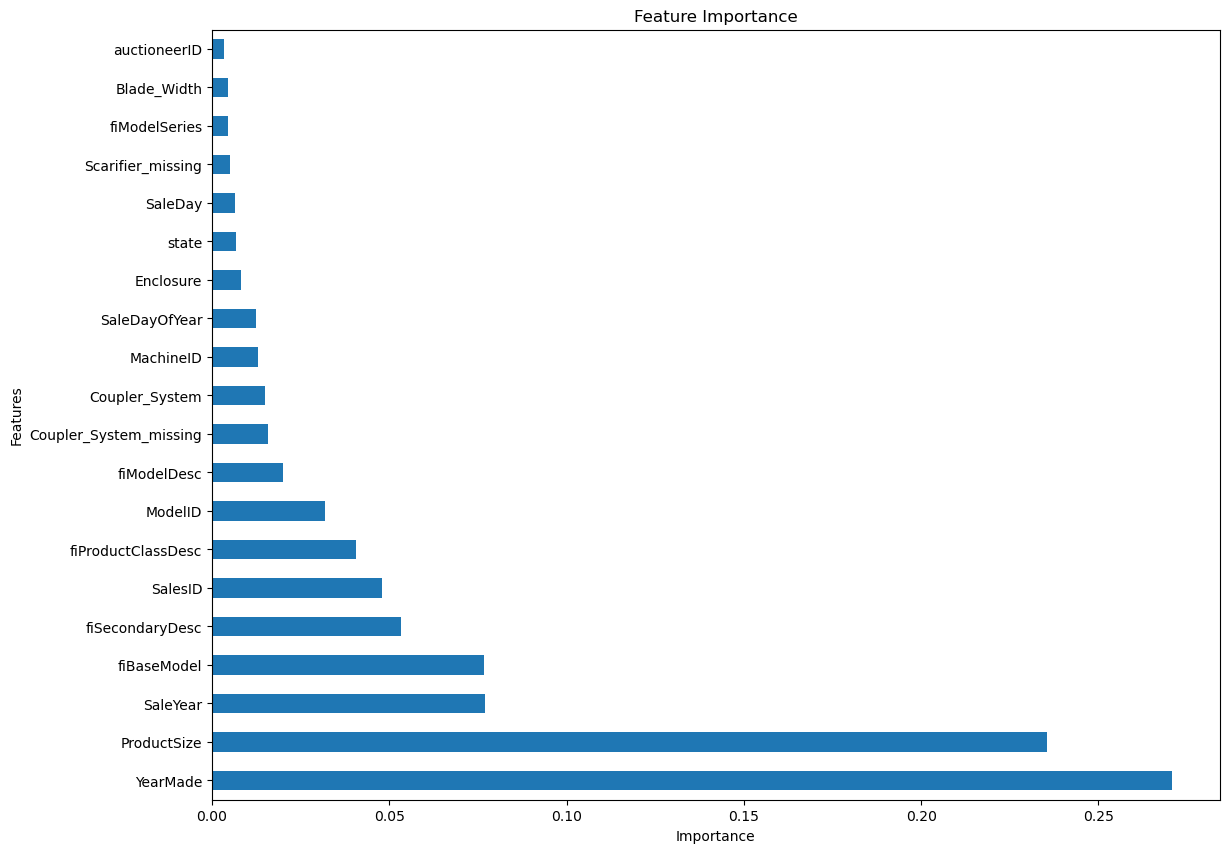

In [31]:
feature_importance(20)